In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
house_data = pd.read_csv('datasets/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1)
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [8]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [10]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [11]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [12]:
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,28


In [13]:
house_data.drop(['date', 'yr_built'], inplace=True, axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


Encoding the column 'yr_renovated' to 1 and 0 to denote renovated(1) and not-renovated(0) into a new column 'renovated'

In [15]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
house_data.drop('yr_renovated', inplace=True, axis=1)

KeyError: 'yr_renovated'

In [16]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [19]:
house_data[['house_age', 'renovated']].head()

,house_age,renovated
0,59,0
1,63,1
2,82,0
3,49,0
4,28,0


In [20]:
house_data.to_csv('datasets/house_data_preprocessed.csv', index=False)

<h4>Regression plot of square fit living and price of the house. </h4>

/home/bu113t/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


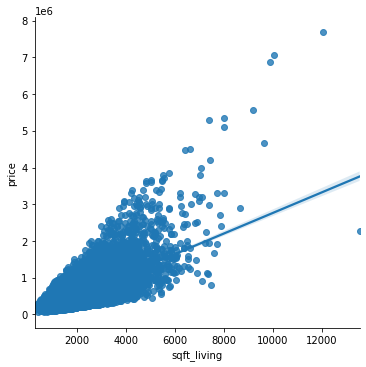

In [22]:
sns.lmplot('sqft_living', 'price', house_data)

We can see that, there is a linear relationship between the price and sqft_living of the house.

<h4>Regresion plot of house age and the price of the house </h4>

/home/bu113t/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


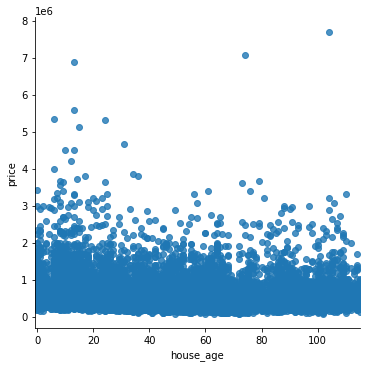

In [23]:
sns.lmplot('house_age', 'price', house_data)

This shows that there is no clear relationship between house_age and the price of the house.

<h4>Regression plot between the price and the number of floors of the house <h4>

/home/bu113t/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


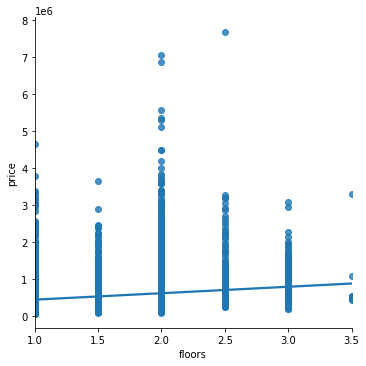

In [25]:
sns.lmplot('floors', 'price', house_data)

There is still no clear relationship between the number of floors and price of the house

### Performing regression analysis using 'sqft_living' with just one predictor

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
## predictor
X = house_data[['sqft_living']]

## predict
y = house_data['price']

In [32]:
X.head(), y.head()

(   sqft_living
 0         1180
 1         2570
 2          770
 3         1960
 4         1680,
 0    221900.0
 1    538000.0
 2    180000.0
 3    604000.0
 4    510000.0
 Name: price, dtype: float64)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
X_train.shape, y_train.shape

((17290, 1), (17290,))

In [36]:
X_test.shape, y_test.shape

((4323, 1), (4323,))

<h4>Standardizing the data</h4>

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

***Note***: *scaler.fit_transform()* subtracts mean from every value in training data and divide each by standard deviation. This makes all our X data centered around the mean and expressed in terms of Standard Deviation  

In [38]:
X_test = scaler.fit_transform(X_test)

### Predicting using LinearRegression() model

In [40]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)  # training
y_pred = model.predict(X_test) # predicting

Comparing the predicted value from the actual value in our test data.

In [42]:
df = pd.DataFrame({'test':y_test, 'predicted':y_pred})
df.sample(10)

,test,predicted
7581,678940.0,6.942255e+05
8781,380000.0,6.046310e+05
21043,375000.0,1.479881e+05
14716,1160000.0,9.687892e+05
4077,875000.0,2.924953e+05
19336,874950.0,2.520333e+05
15255,3640900.0,1.335838e+06
4154,631000.0,4.225519e+05
21563,337000.0,6.537634e+05
4815,310000.0,5.381577e+05


We can see that only some predicted values are well and the rest aren't so good.

##### Using scatter plot for better visualization of data

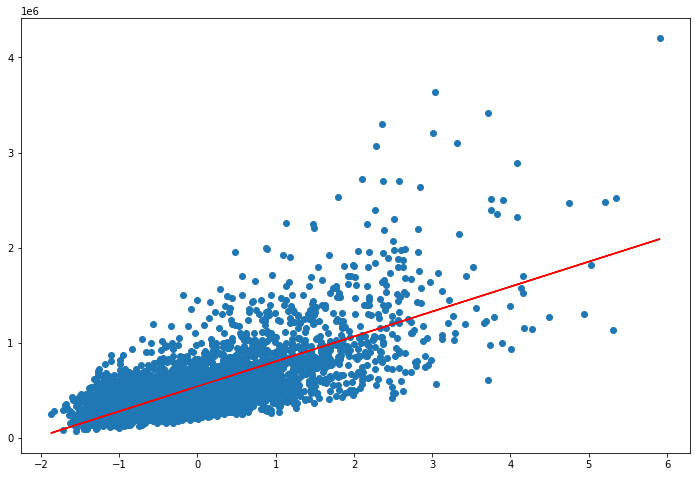

In [43]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show()

We can see that the red line captures the data fairly well. But to know how well, we  will calculate R$^2$

In [44]:
print("Training score: ", linear_regression.score(X_train, y_train))

Training score:  0.4953699160206855


The R$^2$ value shows how much of the variance in the data was captured by the linear model

**Calculating R$^2$ on test data**

In [45]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Testing score: ", score)

Testing score:  0.478966000814412


Training score $\approx$ Testing score <br>
This indicates that this is a fairly robust model.


In [47]:
theta_0 = linear_regression.coef_
theta_0

array([262345.6863588])

In [48]:
intercept = linear_regression.intercept_
intercept

540517.5015037594

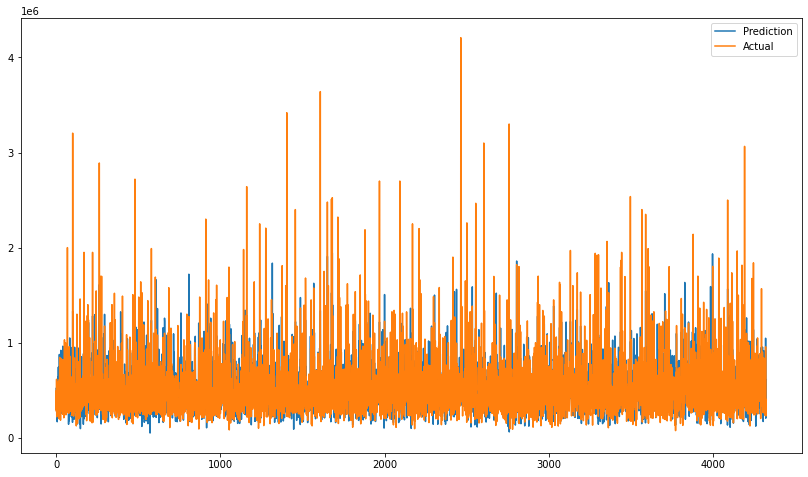

In [49]:
plt.subplots(figsize=(14, 8))

plt.plot(y_pred, label='Prediction')
plt.plot(y_test.values, label='Actual')

plt.legend()
plt.show()

Performing regression analysis with one predictor analytically using the stats models by fitting the regression formula y=mx+c

In [50]:
import statsmodels.api as sm

In [51]:
X_train[:5]

array([[ 1.13961192],
       [-0.5866343 ],
       [-0.33692573],
       [ 2.77900299],
       [-1.31404623]])

fitting in regression model with intercept

In [52]:
X_train = sm.add_constant(X_train)
X_train[:5]

array([[ 1.        ,  1.13961192],
       [ 1.        , -0.5866343 ],
       [ 1.        , -0.33692573],
       [ 1.        ,  2.77900299],
       [ 1.        , -1.31404623]])

The column 1 represents intercept

In [54]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.697e+04
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:11   Log-Likelihood:            -2.4043e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.405e+05   2013.832    268.402      0.0

- The R-Squared value is the same value given by sklearn. 
- The value of p is 0 which states that our regression analysis was significant
- The co-efficient and the intercept value returned by machine learning algorithm is same to the one returned by this analytical model

In [55]:
theta_0, intercept

(array([262345.6863588]), 540517.5015037594)